In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [18]:
from sklearn.preprocessing import LabelEncoder, Binarizer

#NULL 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis =1, inplace = True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [54]:
def get_clf_eval(y_test, pred = None, proba = None):
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 {0:0.4f}, 정밀도 {1:0.4f}, 재현율 {2:0.4f}, f1{3:0.4f}, AUC:{4:0.4f}'.format(accuracy, precision, recall,f1, auc)) #{순서}

In [19]:
def get_eval_by_threshold(y_test, proba, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold = threshold).fit(proba)
        custom_predict = binarizer.transform(proba)
        print('임계값:{0)}'.format(threshold))
        get_clf_eval(y_test, custom_predict, proba)        

In [ ]:
def precision_recall_plot(y_pred, proba):
    precisions, recalls, thresholds = precision_recall_curve(y_pred, proba)
    
    plt.figure(figsize = (8,6))
    

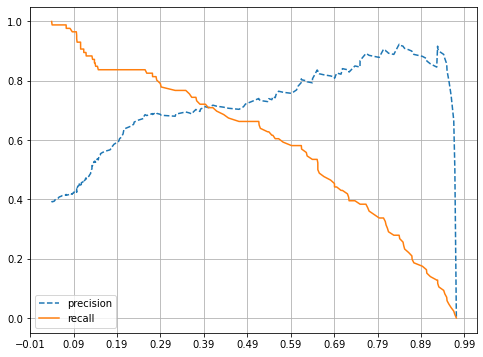

In [42]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1) ##
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,proba)

In [30]:
titanic_df = pd.read_csv('C://Users/user/PerfectGuide/train.csv') 
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)

X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, stratify = y_titanic_df)

clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test) #애초에 여기서 열 하나만 선택해줘야함.
proba = pred_proba[:,1].reshape(-1,1)

In [43]:
precisions, recalls, thresholds = precision_recall_curve(y_test, proba)

In [55]:
threshold = np.arange(0, 0.51, 0.03)

binarizer = Binarizer(threshold = 0.42)
binarizer_pred = binarizer.transform(pred_proba)
get_clf_eval(y_test, binarizer_pred[:,1], proba)

오차행렬
[[113  24]
 [ 27  59]]
정확도 0.7713, 정밀도 0.7108, 재현율 0.6860, f10.6982, AUC:0.7554


In [56]:
np.append(threshold, 0.5)

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5 ])

In [126]:
diabete = pd.read_csv('C://Users/user/Downloads/diabetes.csv')

In [131]:
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.576145
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.310515
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348958
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.348958
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.348958
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
columns = diabete.columns
re_columns = columns.drop(columns[6:8],columns[0])
re_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')

In [130]:
zero_feature = diabete[re_columns].mean()
diabete[re_columns] = diabete[re_columns].replace(0,zero_feature)

In [148]:
diabete= diabete.astype({'Outcome':'int'})
y = diabete['Outcome']
X = diabete.iloc[:,:-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int32

In [149]:
diabete['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int32

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,stratify = y)

clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test,pred,proba)

오차행렬
[[92  8]
 [24 30]]
정확도 0.7922, 정밀도 0.7895, 재현율 0.5556, f10.6522, AUC:0.7378


In [153]:
binarizer = Binarizer(threshold = 0.48)
pred_th_048 = binarizer.fit_transform(proba)
get_clf_eval(y_test, pred_th_048, proba)
pred_th_048

오차행렬
[[91  9]
 [24 30]]
정확도 0.7857, 정밀도 0.7692, 재현율 0.5556, f10.6452, AUC:0.7328


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],